# Medical Insurance Cost With Regression Models


# Business Case Understanding

### USE CASE ANALYSIS:

The purpose of developing a model to predict insurance costs based on features like BMI, Sex, Smoking, Region, Age, and Children is to enable insurance companies to accurately assess risk, price policies, segment customers, streamline underwriting processes, and formulate effective market strategies. For example, a 35-year-old non-smoking female with a BMI of 25, living in a suburban region, and having two children can have her insurance premium estimated with data-driven precision, improving transparency and customer trust. This ensures fair and competitive pricing, better customer service, and operational efficiency for the insurance industry.

From the viewpoint of end users: Developing this model can help a user who wants to get insurance. If the capability of our model is used to create an interactive application or website, it may be as easy as filling out the form and receiving an approximate figure of the premium cost. All parties involved stand to gain from this case.


# Data Identification

The Data set has been acquired from kaggle for this project. You can find the data set here: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression


### Understanding the data


You have little to no control over several factors that determine how much you spend for health insurance. Nevertheless, it's beneficial to understand what they are. Here are several elements that influence the price of health insurance premiums.


* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##  Exploratory Data Analysis

In [ ]:
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is very good. First lets look at how the charges are distributed according to given factors

## Data Analysis

Charges by region

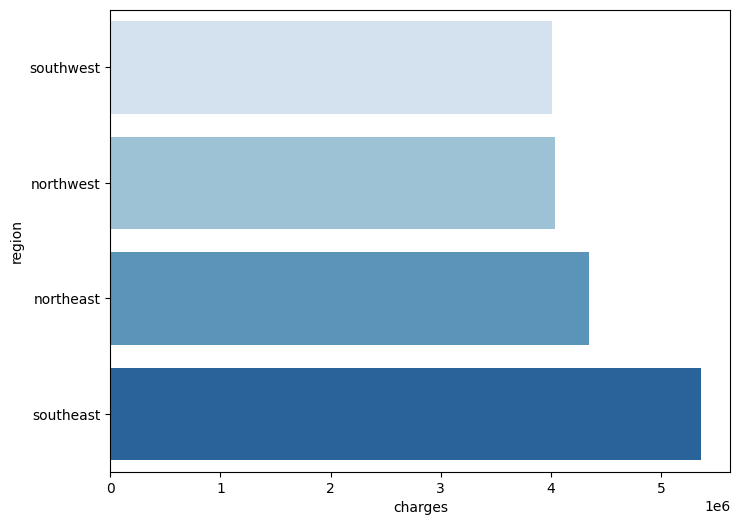

In [ ]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

In [ ]:
charges

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64


The highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) to see how it changes by region

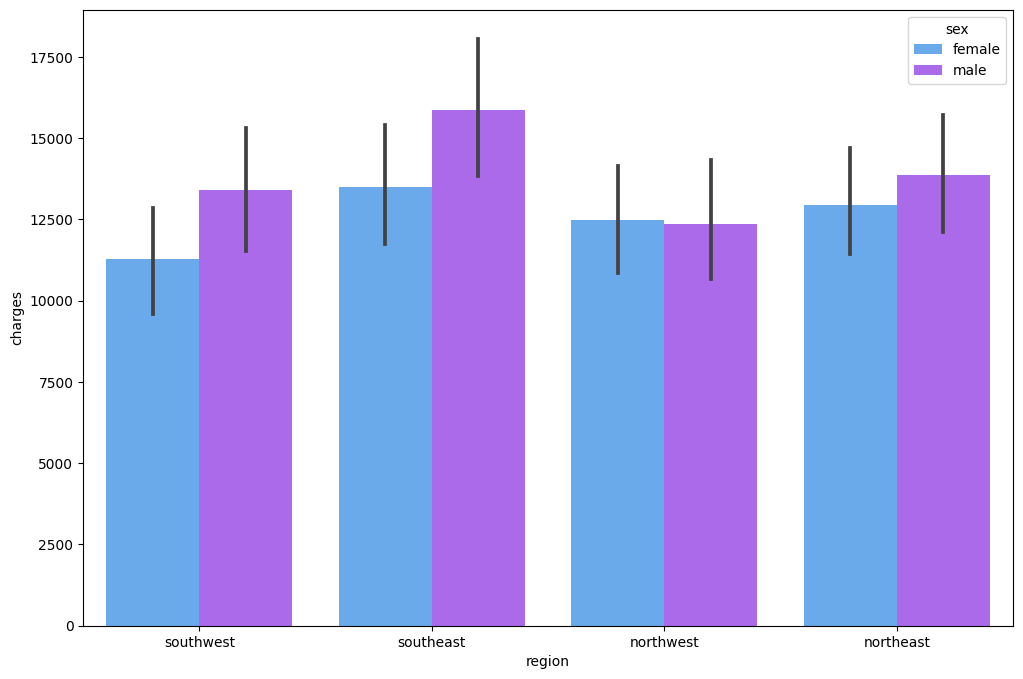

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

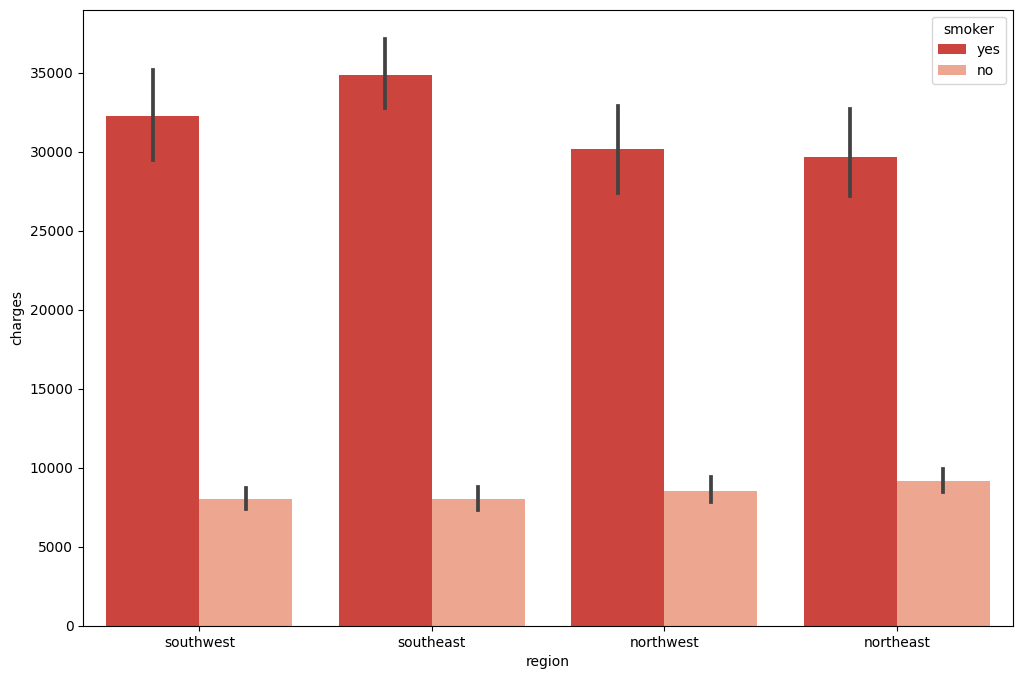

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

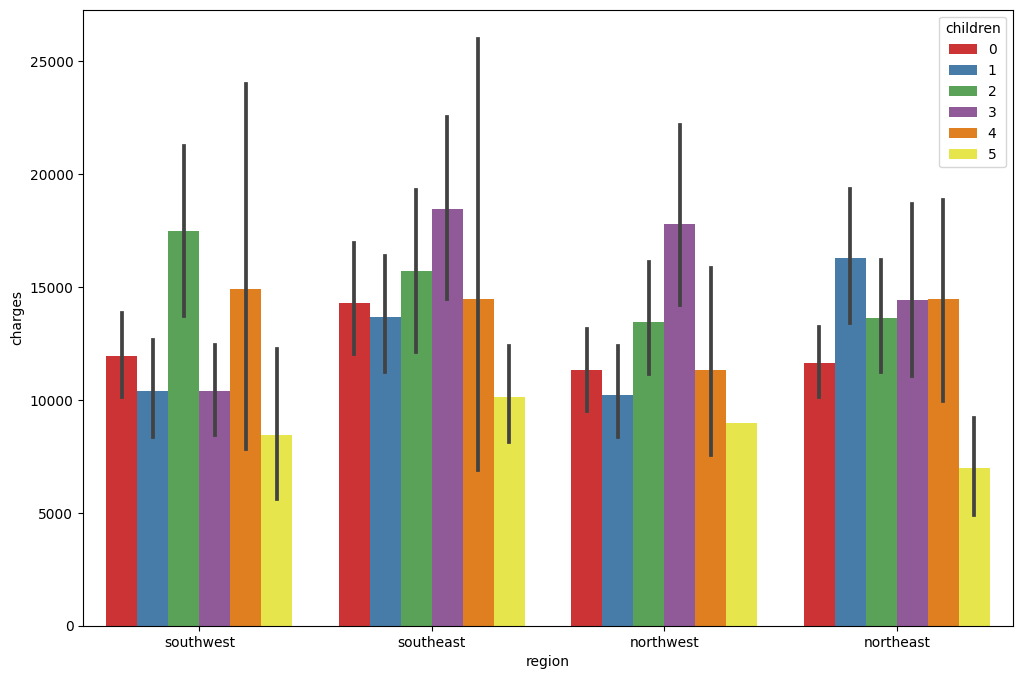

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

These barplots show that the Southeast continues to have the highest smoking-related charges, while the Northeast has the lowest rates. Although persons in the Northeast have higher charges overall than those in the Southwest and Northwest overall, people in the Southwest generally smoke more than those in the Northeast. Additionally, medical expenses for all patients who have children are typically higher.

## Data Extraction:

In [ ]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

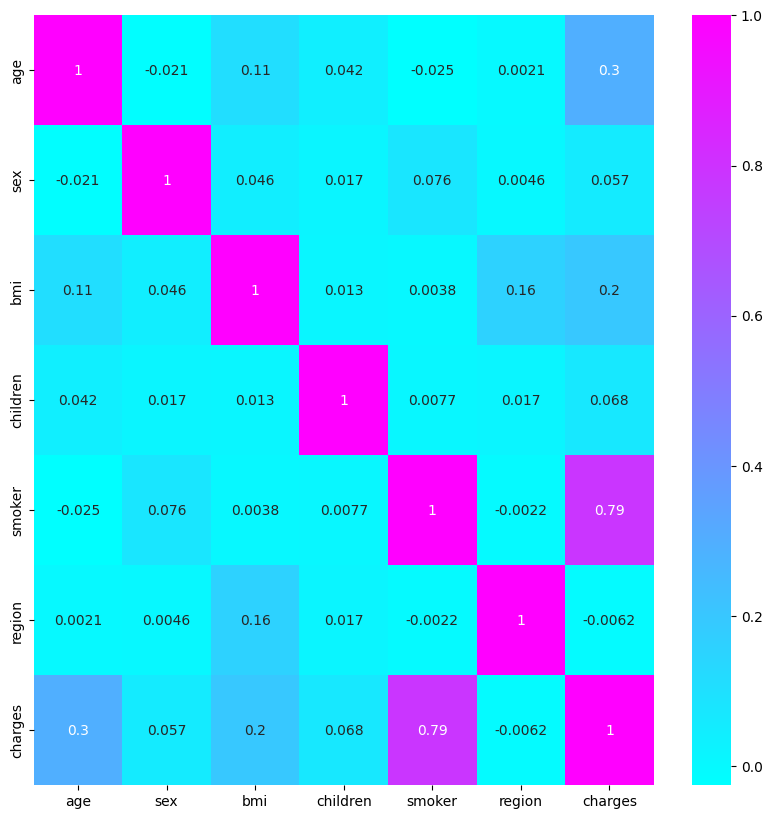

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

No correlation, except with the smoking

# Utilization of Analysis Results

<font size=5><p style="color:purple"> Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.98390882441
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


In [ ]:
# Make predictions on the test data
y_pred = Lin_reg.predict(x_test)


# Display the R-squared score
r_squared = Lin_reg.score(x_test, y_test)
print("R-squared score:", r_squared)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-squared score: 0.7998747145449959
Mean Absolute Error: 3930.3332739011403


<font size=5><p style="color:purple"> Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

r_squared = Pol_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_test_pred)

print("R-squared score:", r_squared)
print("Mean Absolute Error:", mae)

R-squared score: 0.8812595703345227
Mean Absolute Error: 2824.495045477652


In [ ]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
p_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
p_df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


**Conclusion:** like we previously noticed **smoking** is the greatest factor that affects medical cost charges, then it's **bmi** and **age**. **Polynomial Regression** turned out to be the best model

## References

* https://pandas.pydata.org/docs/index.html
* https://numpy.org/
* https://seaborn.pydata.org/index.html
* https://matplotlib.org/
* https://scikit-learn.org/stable/index.html
* https://www.kaggle.com/datasets/mirichoi0218/insurance
* https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb


